In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering ,KMeans , DBSCAN
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage , dendrogram

In [2]:
data = pd.read_csv(r"C:\Users\user\Downloads\crime_data.csv")

In [3]:
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
df1 = data.drop(['Unnamed: 0'] , axis = 1)

In [6]:
df1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [7]:
## Normalization function

def norm_func(i):
    x = (i - i.min())/(i.max() - i.min())
    return(x)

In [10]:
## normalization of data frame

df_norm = norm_func(data.iloc[: ,1:])

In [11]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [12]:
scaler = StandardScaler()
X = scaler.fit_transform(df1)




In [13]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [14]:
pd.DataFrame(X).head()

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [15]:
## hierarchical clustering

hclustering = AgglomerativeClustering(n_clusters = 3 , linkage = 'ward')
hclustering.fit(X)
hlabels = hclustering.labels_

In [16]:
hlabels

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1], dtype=int64)

In [17]:
h = pd.DataFrame(hlabels , columns = ['Cluster'])

In [18]:
h.head()

,Cluster
0,0
1,0
2,0
3,1
4,0


In [19]:
cluster = pd.concat([df1 , h] , axis = 1)

In [20]:
cluster.head()

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,0


Text(0, 0.5, 'UrbanPop')

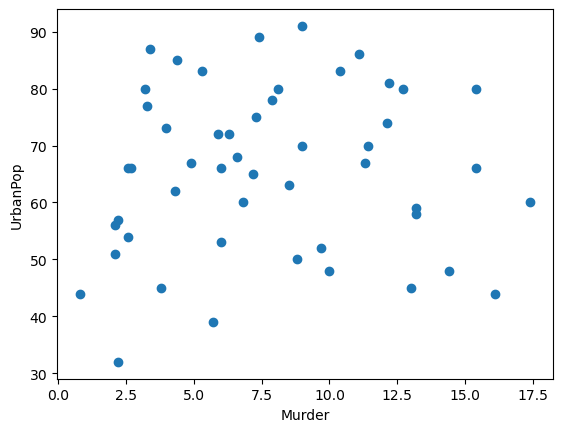

In [21]:
plt.scatter(cluster['Murder'] , cluster['UrbanPop'])
plt.xlabel('Murder')
plt.ylabel('UrbanPop')

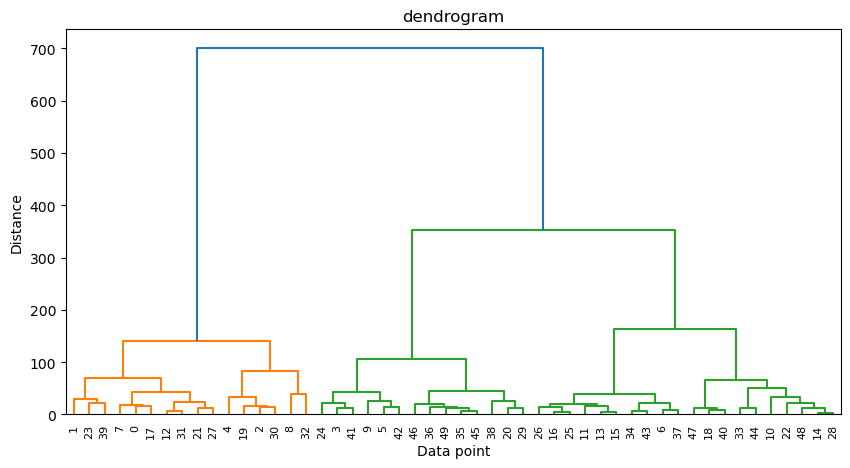

In [22]:
## determine the number cluster is formed

z = linkage(df1 , method =  'ward')

plt.figure(figsize = (10,5))
dendrogram(z)
plt.xlabel('Data point')
plt.ylabel('Distance')
plt.title('dendrogram')
plt.show()

## K-Means Clustering

In [23]:
kmeans = KMeans(n_clusters = 3 , random_state = 42)
kmeans.fit(X)
klabels = kmeans.labels_

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [24]:
klabels

array([1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0, 1,
       2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0,
       2, 0, 0, 2, 2, 0])

In [25]:
k = pd.DataFrame(klabels , columns = ['cluster_k'])

In [26]:
k.head()

,cluster_k
0,1
1,1
2,1
3,2
4,1


In [27]:
cluster2 = pd.concat([cluster , k] , axis = 1)

In [28]:
cluster2.head()

,Murder,Assault,UrbanPop,Rape,Cluster,cluster_k
0,13.2,236,58,21.2,0,1
1,10.0,263,48,44.5,0,1
2,8.1,294,80,31.0,0,1
3,8.8,190,50,19.5,1,2
4,9.0,276,91,40.6,0,1


## Perform DBSCAN

In [29]:
dbscan =  DBSCAN(eps = 0.5 , min_samples = 5)
dbscan.fit(X)
dlabels = dbscan.labels_

In [30]:
dlabels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [31]:
d = pd.DataFrame(dlabels, columns = ['cluster_db'])

In [32]:
d.head()

,cluster_db
0,-1
1,-1
2,-1
3,-1
4,-1


In [33]:
cluster3 = pd.concat([cluster2 , d ] , axis = 1)

In [34]:
cluster3.head()

,Murder,Assault,UrbanPop,Rape,Cluster,cluster_k,cluster_db
0,13.2,236,58,21.2,0,1,-1
1,10.0,263,48,44.5,0,1,-1
2,8.1,294,80,31.0,0,1,-1
3,8.8,190,50,19.5,1,2,-1
4,9.0,276,91,40.6,0,1,-1


Text(0, 0.5, 'Assault')

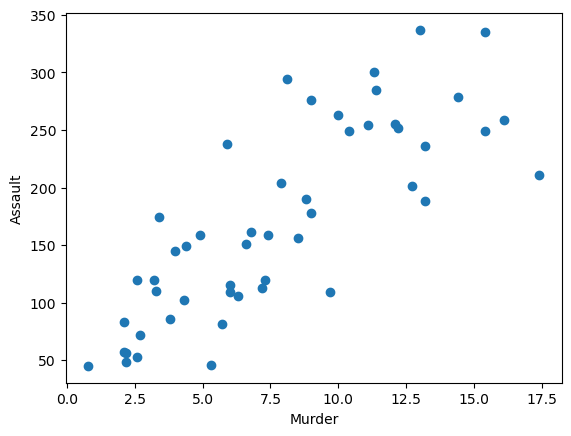

In [35]:
## plot the cluster

plt.scatter(df1['Murder'] , df1['Assault'] )
plt.xlabel('Murder')
plt.ylabel('Assault')

Text(0, 0.5, 'cluster')

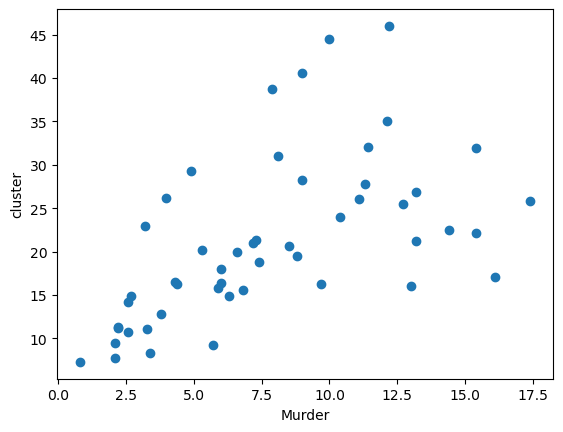

In [36]:
plt.scatter(cluster['Murder'] , cluster['Rape'])
plt.xlabel('Murder')
plt.ylabel('cluster')

In [38]:
import seaborn as sn

C:\Users\user\AppData\Local\Temp\ipykernel_10564\714225585.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df1['Murder'] , color = 'red')


<Axes: xlabel='Murder', ylabel='Density'>

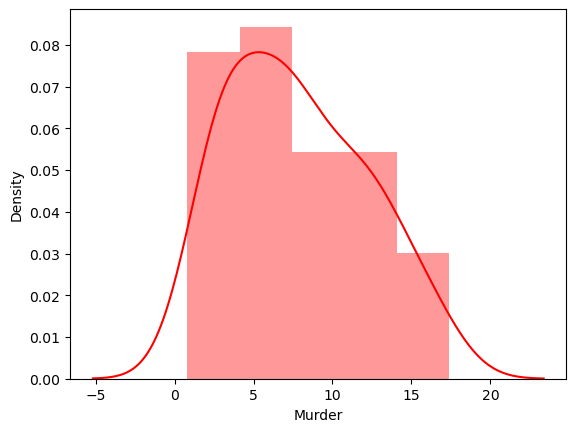

In [39]:
sn.distplot(df1['Murder'] , color = 'red')

<Axes: xlabel='Murder', ylabel='Count'>

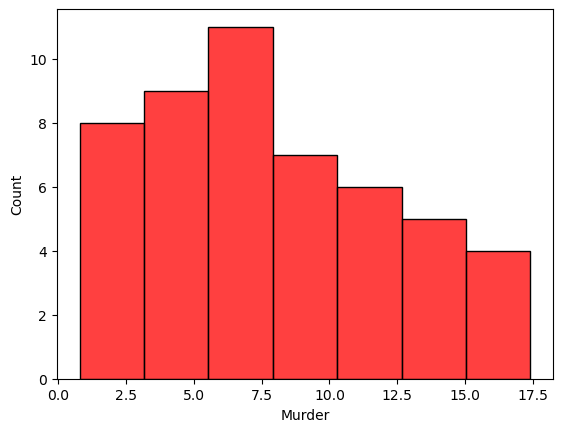

In [40]:
sn.histplot(df1['Murder'] , color = 'red')

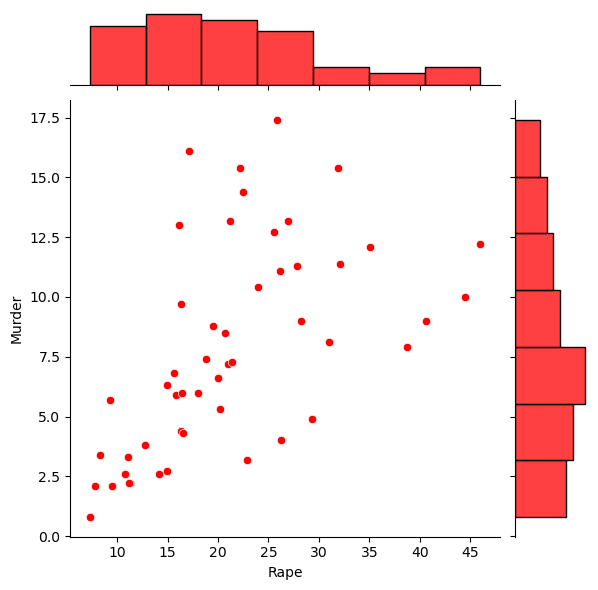

In [41]:
sn.jointplot(x = 'Rape' , y = 'Murder' , data = df1 , color = 'red')

<Axes: >

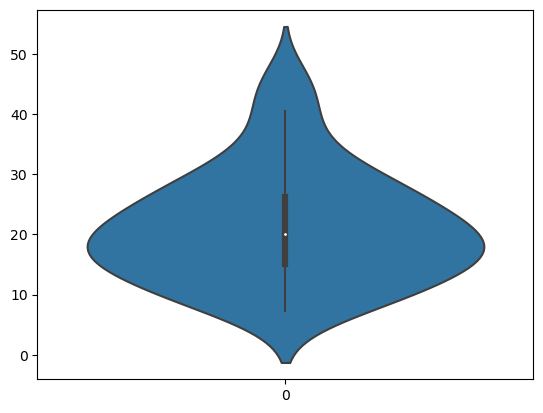

In [42]:
sn.violinplot(df1['Rape'])